In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
from ion_toolkit import Ion
from ion_toolkit.laser import Laser, Polarization
from ion_toolkit.experiment import Experiment
from ion_toolkit.units import Units, Constants
from ion_toolkit.utils import get_resonant_frequency

In [5]:
ion = Ion("Ba", 138)

In [6]:
ion.energy_levels

[FineStructure(energy=0.0 THz, n=6, I=0, L=0, J=0.5),
 FineStructure(energy=607.4263 THz, n=6, I=0, L=1, J=0.5),
 FineStructure(energy=658.1165 THz, n=6, I=0, L=1, J=1.5),
 FineStructure(energy=146.1144 THz, n=5, I=0, L=2, J=1.5),
 FineStructure(energy=170.1264 THz, n=5, I=0, L=2, J=2.5)]

In [16]:
ion.energy_levels[3]

FineStructure(energy=146.1144 THz, n=5, I=0, L=2, J=1.5)

In [7]:
ion.apply_magnetic_field(5 * Units.T)

In [53]:
laser_493 = Laser(
    "493 nm",
    get_resonant_frequency(ion.energy_levels[0], ion.energy_levels[1]),
    2550, 
    10 * Units.kHz, 
    Polarization(np.array([0, 0, 1]), 1 / np.sqrt(2), -1j / np.sqrt(2))
)

In [70]:
laser_650 = Laser(
    "650 nm",
    get_resonant_frequency(ion.energy_levels[1], ion.energy_levels[3]),
    250, 
    10 * Units.kHz, 
    Polarization(np.array([1, 0, 0]), 1 / np.sqrt(2), -1j / np.sqrt(2))
)

In [71]:
experiment = Experiment(ion, 100 * Units.T)

In [72]:
experiment.add_laser(
    laser_493, 
    [
        (ion.energy_levels[0], ion.energy_levels[1])
    ]
)

In [73]:
experiment.add_laser(
    laser_650, 
    [
        (ion.energy_levels[1], ion.energy_levels[3])
    ]
)

In [74]:
for t in experiment.transitions:
    if np.abs(t.rabi_frequency) > 100:
        print(f"From: {t.upper_level}")
        print(f"To: {t.lower_level}")
        print(t.rabi_frequency / (2 * np.pi * Units.MHz))

From: FineStructureZeemanLevel(energy=607.8928414975211 THz, n=6, I=0, L=1, J=0.5, m_J=0.5)
To: FineStructureZeemanLevel(energy=-1.3996244925632675 THz, n=6, I=0, L=0, J=0.5, m_J=-0.5)
(-33.740213570987606+0j)
From: FineStructureZeemanLevel(energy=606.959758502479 THz, n=6, I=0, L=1, J=0.5, m_J=-0.5)
To: FineStructureZeemanLevel(energy=144.43485060892405 THz, n=5, I=0, L=2, J=1.5, m_J=-1.5)
(-4.182236952659789+0j)
From: FineStructureZeemanLevel(energy=606.959758502479 THz, n=6, I=0, L=1, J=0.5, m_J=-0.5)
To: FineStructureZeemanLevel(energy=145.5545502029747 THz, n=5, I=0, L=2, J=1.5, m_J=-0.5)
(4.82923126086586+0j)
From: FineStructureZeemanLevel(energy=606.959758502479 THz, n=6, I=0, L=1, J=0.5, m_J=-0.5)
To: FineStructureZeemanLevel(energy=146.6742497970253 THz, n=5, I=0, L=2, J=1.5, m_J=0.5)
(-2.4146156304329294+0j)
From: FineStructureZeemanLevel(energy=607.8928414975211 THz, n=6, I=0, L=1, J=0.5, m_J=0.5)
To: FineStructureZeemanLevel(energy=145.5545502029747 THz, n=5, I=0, L=2, J=1.

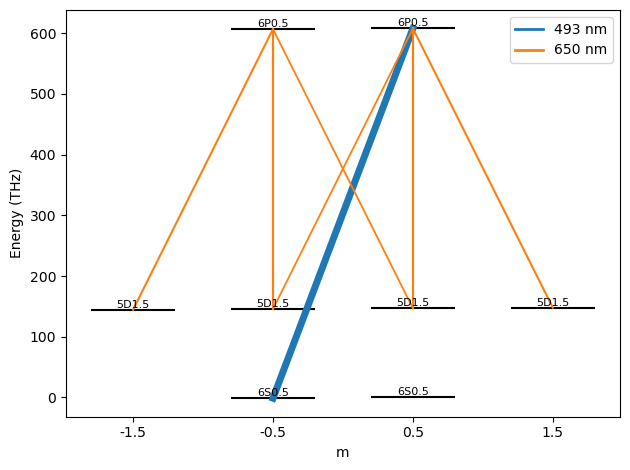

In [75]:
experiment.plot_transitions()